In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn.preprocessing import *
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [2]:
from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.SettingWithCopyWarning)

In [3]:
def data_transform(df):
    '''
    Function for our data transformation. Can be updated and edited as required.
    Input:
    df - DataFrame to be transformed
  
    Returns:
    Transformed DataFrame
    '''
    df.drop(columns=['stem-root', 'veil-type', 'veil-color', 'spore-print-color'], inplace=True)

    numeric_cols = df.select_dtypes(include=np.number).columns
    df[numeric_cols] = df[numeric_cols].fillna(df_train[numeric_cols].median())

    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        df[col] = df[col].fillna(df_train[col].mode()[0])

    return df

In [4]:
def ohecoder(df):
    '''
    One Hot Encoder for the features of the DataFrame
    Input:
    df - DataFrame to be One Hot Encoded

    Returns:
    One Hot Encoded DataFrame
    '''
    i = 0
    templist = []
    for t in range(97, 123):
        templist.append(chr(t))
        
    for label, content in df.items():
        if not pd.api.types.is_numeric_dtype(content):
            for a in templist:
                if not a in df[label].unique():
                    df = pd.concat([df, df[:len(df)-2:-1]], ignore_index = True)
                    i+=1
                    df.loc[len(df)-1, label] = a
        
    for label, content in df.items():
        if not pd.api.types.is_numeric_dtype(content):
            b = pd.get_dummies(df[label], prefix = label)
            for name, values in b.items():
                b[name] = b[name].astype(int)

            df = pd.concat([df, b], axis = 1)
            df.drop(columns = label, inplace = True)

    while i != 0:
        df.drop(index = len(df)-1, inplace = True)
        i-=1

    return df

In [5]:
def tencoder(a):
    a = a.replace('e', 0)
    a = a.replace('p', 1)
    for label, content in a.items():
        a[label] = a[label].astype(int)
    return a

In [6]:
def tdecoder(a):
    a = a.replace(0, 'e')
    a = a.replace(1, 'p')
    return a

In [7]:
sns.set(font_scale=1.5) # Increase font size
 
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    y_test : true labels
    y_preds : predicted data
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot= True, # Annotate the boxes
                     cbar= False,
                     cmap = 'coolwarm')
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis

In [8]:
df_train = pd.read_csv('mushroom/train.csv', low_memory = False)
df_test = pd.read_csv('mushroom/test.csv', low_memory = False)
df_train.drop('id', axis = 1, inplace = True)
df_test.drop('id', axis = 1, inplace = True)

In [9]:
df_train.isna().sum()

class                         0
cap-diameter                  4
cap-shape                    40
cap-surface              671023
cap-color                    12
does-bruise-or-bleed          8
gill-attachment          523936
gill-spacing            1258435
gill-color                   57
stem-height                   0
stem-width                    0
stem-root               2757023
stem-surface            1980861
stem-color                   38
veil-type               2957493
veil-color              2740947
has-ring                     24
ring-type                128880
spore-print-color       2849682
habitat                      45
season                        0
dtype: int64

In [10]:
df_null = df_train.isnull().sum()
df_null = df_null.sort_values(ascending = False)
df_null

veil-type               2957493
spore-print-color       2849682
stem-root               2757023
veil-color              2740947
stem-surface            1980861
gill-spacing            1258435
cap-surface              671023
gill-attachment          523936
ring-type                128880
gill-color                   57
habitat                      45
cap-shape                    40
stem-color                   38
has-ring                     24
cap-color                    12
does-bruise-or-bleed          8
cap-diameter                  4
class                         0
stem-width                    0
stem-height                   0
season                        0
dtype: int64

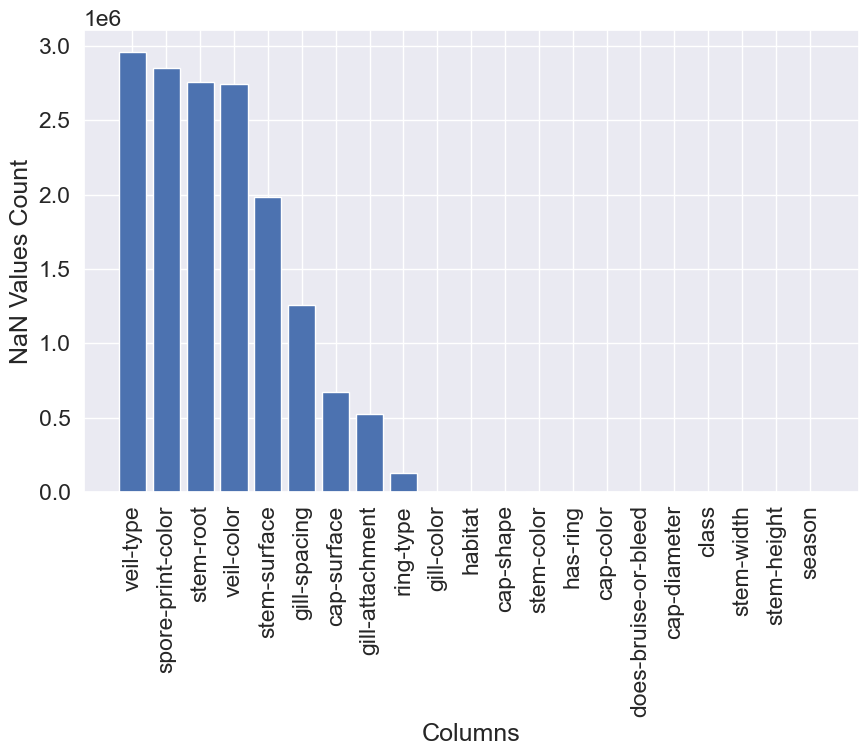

In [11]:
fig, ax = plt.subplots(figsize = (10,6))
ax.bar(df_null.index, df_null.values)
plt.xlabel('Columns')
plt.ylabel('NaN Values Count')
plt.xticks(rotation=90);

In [12]:
df_train['class'].value_counts()

class
p    1705396
e    1411549
Name: count, dtype: int64

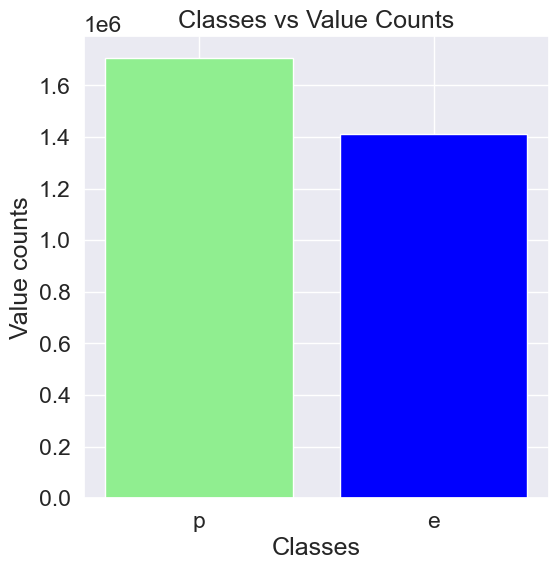

In [13]:
fig, ax = plt.subplots(figsize = (6,6))
ax.bar(df_train['class'].value_counts().keys(), df_train['class'].value_counts(), color =  ['lightgreen', 'blue'])
ax.set_ylabel('Value counts')
ax.set_xlabel('Classes')
ax.set_title('Classes vs Value Counts');
#df_train['class'].value_counts().plot(kind = 'bar', color = ['salmon', 'blue']);

In [14]:
df_train = data_transform(df_train)

print(df_train.isnull().sum())

class                   0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-surface            0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64


In [15]:
df_test = data_transform(df_test)

print(df_test.isnull().sum())

cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-surface            0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64


In [16]:
templist = []
for i in range(97, 123):
    templist.append(chr(i))

print(templist)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [17]:
for label, content in df_test.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)
        for value in content:
            if not value in templist:
                df_test = df_test.replace(value, df_test[label].mode()[0])

cap-shape
cap-surface
cap-color
does-bruise-or-bleed
gill-attachment
gill-spacing
gill-color
stem-surface
stem-color
has-ring
ring-type
habitat
season


In [18]:
dftemp = df_train.copy()

In [19]:
for label, content in dftemp.items():
    if not pd.api.types.is_any_real_numeric_dtype(content):
        print(label)
        for value in content:
            if not value in templist:
                dftemp = dftemp[dftemp[label] != value]

class
cap-shape
cap-surface
cap-color
does-bruise-or-bleed
gill-attachment
gill-spacing
gill-color
stem-surface
stem-color
has-ring
ring-type
habitat
season


In [20]:
X = dftemp.drop(columns = 'class')
X.head()

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-surface,stem-color,has-ring,ring-type,habitat,season
0,8.80,f,s,u,f,a,c,w,4.51,15.39,s,w,f,f,d,a
1,4.51,x,h,o,f,a,c,n,4.79,6.48,y,o,t,z,d,w
2,6.94,f,s,b,f,x,c,w,6.85,9.93,s,n,f,f,l,w
3,3.88,f,y,g,f,s,c,g,4.16,6.53,s,w,f,f,d,u
4,5.85,x,l,w,f,d,c,w,3.37,8.36,s,w,f,f,g,a


In [21]:
y = dftemp['class']
y.head()

0    e
1    p
2    e
3    e
4    e
Name: class, dtype: object

In [22]:
%%time
X = ohecoder(X)
X

CPU times: total: 3min 44s
Wall time: 3min 45s


,cap-diameter,stem-height,stem-width,cap-shape_a,cap-shape_b,cap-shape_c,cap-shape_d,cap-shape_e,cap-shape_f,cap-shape_g,...,season_q,season_r,season_s,season_t,season_u,season_v,season_w,season_x,season_y,season_z
0,8.80,4.51,15.39,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,4.51,4.79,6.48,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,6.94,6.85,9.93,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,3.88,4.16,6.53,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,5.85,3.37,8.36,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116424,9.29,12.14,18.81,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3116425,10.88,6.65,26.97,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3116426,7.82,9.51,11.06,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3116427,9.45,9.13,17.77,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [23]:
%%time
df_test = ohecoder(df_test)
df_test

CPU times: total: 2min 31s
Wall time: 2min 32s


,cap-diameter,stem-height,stem-width,cap-shape_a,cap-shape_b,cap-shape_c,cap-shape_d,cap-shape_e,cap-shape_f,cap-shape_g,...,season_q,season_r,season_s,season_t,season_u,season_v,season_w,season_x,season_y,season_z
0,8.64,11.13,17.12,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6.90,1.27,10.75,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.00,6.18,3.14,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3.47,4.98,8.51,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,6.17,6.73,13.70,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2077959,0.88,2.67,1.35,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2077960,3.12,2.69,7.38,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2077961,5.73,6.16,9.74,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2077962,5.03,6.00,3.46,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
y = tencoder(y)
y

C:\Users\joshu\AppData\Local\Temp\ipykernel_12552\3828241411.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  a = a.replace('p', 1)


0          0
1          1
2          0
3          0
4          0
          ..
3116940    0
3116941    0
3116942    1
3116943    0
3116944    1
Name: class, Length: 3116429, dtype: int64

In [25]:
np.random.seed(13)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.1)

In [26]:
'''
model = RandomForestClassifier(n_estimators = 350,
                               criterion = 'entropy',
                               min_samples_split = 8,
                               n_jobs = -1,
                               random_state = 13,
                               verbose = 2)
model.fit(X_train, y_train)
0.9914>>>
'''

"\nmodel = RandomForestClassifier(n_estimators = 350,\n                               criterion = 'entropy',\n                               min_samples_split = 8,\n                               n_jobs = -1,\n                               random_state = 13,\n                               verbose = 2)\nmodel.fit(X_train, y_train)\n"

max leaf nodes

5 :

In [91]:
%%time
model =RandomForestClassifier(n_estimators = 350,
                              criterion = 'entropy',
                              min_samples_split = 8,
                              random_state = 13,
                              n_jobs = -1,
                              verbose = 2)
model.fit(X, y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 350
building tree 2 of 350
building tree 3 of 350
building tree 4 of 350
building tree 5 of 350
building tree 6 of 350
building tree 7 of 350
building tree 8 of 350
building tree 9 of 350
building tree 10 of 350
building tree 11 of 350
building tree 12 of 350
building tree 13 of 350building tree 14 of 350

building tree 15 of 350
building tree 16 of 350
building tree 17 of 350
building tree 18 of 350
building tree 19 of 350
building tree 20 of 350
building tree 21 of 350
building tree 22 of 350
building tree 23 of 350
building tree 24 of 350
building tree 25 of 350
building tree 26 of 350
building tree 27 of 350
building tree 28 of 350
building tree 29 of 350


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.5min


building tree 30 of 350
building tree 31 of 350
building tree 32 of 350
building tree 33 of 350
building tree 34 of 350
building tree 35 of 350
building tree 36 of 350
building tree 37 of 350
building tree 38 of 350
building tree 39 of 350
building tree 40 of 350
building tree 41 of 350
building tree 42 of 350
building tree 43 of 350
building tree 44 of 350
building tree 45 of 350
building tree 46 of 350
building tree 47 of 350
building tree 48 of 350
building tree 49 of 350
building tree 50 of 350
building tree 51 of 350
building tree 52 of 350
building tree 53 of 350
building tree 54 of 350
building tree 55 of 350
building tree 56 of 350
building tree 57 of 350
building tree 58 of 350
building tree 59 of 350
building tree 60 of 350
building tree 61 of 350
building tree 62 of 350
building tree 63 of 350
building tree 64 of 350
building tree 65 of 350
building tree 66 of 350
building tree 67 of 350
building tree 68 of 350
building tree 69 of 350
building tree 70 of 350
building tree 71

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  9.5min


building tree 151 of 350
building tree 152 of 350
building tree 153 of 350
building tree 154 of 350
building tree 155 of 350
building tree 156 of 350
building tree 157 of 350
building tree 158 of 350
building tree 159 of 350
building tree 160 of 350
building tree 161 of 350
building tree 162 of 350
building tree 163 of 350
building tree 164 of 350
building tree 165 of 350
building tree 166 of 350
building tree 167 of 350
building tree 168 of 350
building tree 169 of 350
building tree 170 of 350
building tree 171 of 350
building tree 172 of 350
building tree 173 of 350
building tree 174 of 350
building tree 175 of 350
building tree 176 of 350
building tree 177 of 350
building tree 178 of 350
building tree 179 of 350
building tree 180 of 350
building tree 181 of 350
building tree 182 of 350
building tree 183 of 350
building tree 184 of 350
building tree 185 of 350
building tree 186 of 350
building tree 187 of 350
building tree 188 of 350
building tree 189 of 350
building tree 190 of 350


[Parallel(n_jobs=-1)]: Done 350 out of 350 | elapsed: 23.6min finished


CPU times: total: 4h 21min 51s
Wall time: 24min 29s


RandomForestClassifier(criterion='entropy', min_samples_split=8,
                       n_estimators=350, n_jobs=-1, random_state=13, verbose=2)

In [90]:
model.score(X_val, y_val) # depth = 25 max_samples = 1.5 mil fullxy

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    3.6s
[Parallel(n_jobs=12)]: Done 350 out of 350 | elapsed:    9.0s finished


0.9927994532205119

In [85]:
model.score(X_val, y_val) # depth = 25 max_samples = 1 mil fullxy

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    3.3s
[Parallel(n_jobs=12)]: Done 350 out of 350 | elapsed:    8.0s finished


0.9925010348379396

In [92]:
model.score(X_val, y_val) # flat best params fullxy

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    4.7s
[Parallel(n_jobs=12)]: Done 350 out of 350 | elapsed:   11.4s finished


0.9936529939706652

In [93]:
pred = model.predict(X_val)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    4.6s
[Parallel(n_jobs=12)]: Done 350 out of 350 | elapsed:   11.2s finished


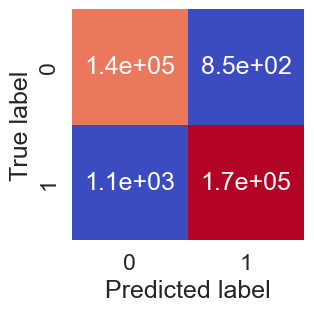

In [94]:
plot_conf_mat(y_val, pred)

In [95]:
confusion_matrix(y_val, pred)

array([[140226,    852],
       [  1126, 169439]], dtype=int64)

# From this point on output mode

In [96]:
preds = model.predict(df_test)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    5.9s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:   32.4s
[Parallel(n_jobs=12)]: Done 350 out of 350 | elapsed:  1.3min finished


In [97]:
type(preds)

numpy.ndarray

In [98]:
preds = tdecoder(pd.Series(preds))

In [99]:
df_id = pd.read_csv('mushroom/test.csv', low_memory = False)
submission = pd.concat([df_id['id'], preds], axis = 1)
submission

,id,0
0,3116945,e
1,3116946,p
2,3116947,p
3,3116948,p
4,3116949,e
...,...,...
2077959,5194904,p
2077960,5194905,p
2077961,5194906,p
2077962,5194907,e


In [100]:
submission.to_csv('submission_15.csv', index = False)

In [101]:
len(submission)

2077964

In [130]:
for label, content in df_train.items():
    if pd.api.types.is_numeric_dtype(content):
        print(f'{label}\n mean = {content.mean()}\n max = {max(content)}\n min = {min(content)}')

cap-diameter
 mean = 6.309847639274992
 max = 80.67
 min = 0.03
stem-height
 mean = 6.348333348839967
 max = 88.72
 min = 0.0
stem-width
 mean = 11.153785296179416
 max = 102.9
 min = 0.0
